In [40]:
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [41]:
#Load the Full colleges dataset
file_path = "../Resources/colleges_cluster.csv"
colleges_full = pd.read_csv(file_path, index_col=0)
colleges_full.head()

,state,applicants_total,enrolled_total,perc_fresh_sat_scores,perc_fresh_act_scores,instate_price,outstate_price,total_enrollment,ft_enrollment,pt_enrollment,...,great_lakes_region,mid_east_region,new_england_region,plains_region,rocky_mountains_region,southeast_region,southwest_region,us_service_schools_region,average_tuition,fullcluster
collegeid,,,,,,,,,,,,,,,,,,,,,
1,1,6142.0,1104.0,15.0,88.0,21849.0,27441.0,5020.0,4439.0,581.0,...,0,0,0,0,0,1,0,0,6.7480,1
2,1,5689.0,1773.0,6.0,93.0,22495.0,31687.0,18568.0,11961.0,6607.0,...,0,0,0,0,0,1,0,0,6.5185,1
3,1,2054.0,651.0,34.0,94.0,23466.0,35780.0,7376.0,4802.0,2574.0,...,0,0,0,0,0,1,0,0,8.3930,1
4,1,10245.0,1479.0,18.0,87.0,18286.0,25222.0,6075.0,5182.0,893.0,...,0,0,0,0,0,1,0,0,7.9745,1
5,1,30975.0,6454.0,23.0,76.0,27000.0,41500.0,34752.0,29498.0,5254.0,...,0,0,0,0,0,1,0,0,8.7875,3


In [42]:
#Load the Training colleges dataset
file_path = "../Resources/colleges_train.csv"
colleges_train = pd.read_csv(file_path, index_col=0)
colleges_train.head()

,state,applicants_total,enrolled_total,perc_fresh_sat_scores,perc_fresh_act_scores,instate_price,outstate_price,total_enrollment,ft_enrollment,pt_enrollment,...,great_lakes_region,mid_east_region,new_england_region,plains_region,rocky_mountains_region,southeast_region,southwest_region,us_service_schools_region,average_tuition,splitcluster
collegeid,,,,,,,,,,,,,,,,,,,,,
630,33,57845.0,5207.0,78.0,22.0,63540.0,63540.0,44599.0,35096.0,9503.0,...,0,1,0,0,0,0,0,0,42.43500,3
57,5,12741.0,1572.0,91.0,32.0,22312.0,33472.0,14526.0,11733.0,2793.0,...,0,0,0,0,0,0,0,0,6.09100,1
485,24,1551.0,318.0,5.0,93.0,39750.0,39750.0,5528.0,3294.0,2234.0,...,0,0,0,1,0,0,0,0,27.74375,0
986,44,4505.0,534.0,59.0,40.0,48630.0,48630.0,2358.0,2259.0,99.0,...,0,0,0,0,0,0,1,0,32.22925,2
55,5,16242.0,3139.0,89.0,39.0,20682.0,31842.0,23060.0,19511.0,3549.0,...,0,0,0,0,0,0,0,0,5.91425,3


In [43]:
#Load the Test colleges dataset
file_path = "../Resources/colleges_test.csv"
colleges_test = pd.read_csv(file_path, index_col=0)
colleges_test.head()

,state,applicants_total,enrolled_total,perc_fresh_sat_scores,perc_fresh_act_scores,instate_price,outstate_price,total_enrollment,ft_enrollment,pt_enrollment,...,great_lakes_region,mid_east_region,new_england_region,plains_region,rocky_mountains_region,southeast_region,southwest_region,us_service_schools_region,average_tuition,splitcluster
collegeid,,,,,,,,,,,,,,,,,,,,,
664,33,3341.0,410.0,82.0,7.0,19284.0,28534.0,4367.0,3657.0,710.0,...,0,1,0,0,0,0,0,0,6.3845,1
738,36,1279.0,302.0,14.0,99.0,35020.0,35020.0,2229.0,1667.0,562.0,...,1,0,0,0,0,0,0,0,22.4975,0
127,7,27479.0,3755.0,91.0,27.0,27244.0,46192.0,25911.0,22482.0,3429.0,...,0,0,1,0,0,0,0,0,11.0875,3
355,19,904.0,266.0,3.0,93.0,23390.0,23390.0,1400.0,1092.0,308.0,...,0,0,0,0,0,1,0,0,13.5775,1
1078,50,2167.0,544.0,6.0,87.0,46220.0,46220.0,2658.0,2341.0,317.0,...,1,0,0,0,0,0,0,0,31.8375,0


In [44]:
#Load the combined Train and Test (split) colleges dataset
file_path = "../Resources/colleges_split.csv"
colleges_split = pd.read_csv(file_path, index_col=0)
colleges_split.head()

,state,applicants_total,enrolled_total,perc_fresh_sat_scores,perc_fresh_act_scores,instate_price,outstate_price,total_enrollment,ft_enrollment,pt_enrollment,...,great_lakes_region,mid_east_region,new_england_region,plains_region,rocky_mountains_region,southeast_region,southwest_region,us_service_schools_region,average_tuition,splitcluster
collegeid,,,,,,,,,,,,,,,,,,,,,
630,33,57845.0,5207.0,78.0,22.0,63540.0,63540.0,44599.0,35096.0,9503.0,...,0,1,0,0,0,0,0,0,42.43500,3
57,5,12741.0,1572.0,91.0,32.0,22312.0,33472.0,14526.0,11733.0,2793.0,...,0,0,0,0,0,0,0,0,6.09100,1
485,24,1551.0,318.0,5.0,93.0,39750.0,39750.0,5528.0,3294.0,2234.0,...,0,0,0,1,0,0,0,0,27.74375,0
986,44,4505.0,534.0,59.0,40.0,48630.0,48630.0,2358.0,2259.0,99.0,...,0,0,0,0,0,0,1,0,32.22925,2
55,5,16242.0,3139.0,89.0,39.0,20682.0,31842.0,23060.0,19511.0,3549.0,...,0,0,0,0,0,0,0,0,5.91425,3


In [11]:
colleges_full.describe()

,state,applicants_total,enrolled_total,perc_fresh_sat_scores,perc_fresh_act_scores,instate_price,outstate_price,total_enrollment,ft_enrollment,pt_enrollment,...,great_lakes_region,mid_east_region,new_england_region,plains_region,rocky_mountains_region,southeast_region,southwest_region,us_service_schools_region,average_tuition,fullcluster
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.0,1111.000000,1111.000000
mean,27.074707,7117.447345,1174.014401,53.042304,54.340234,34598.635464,38958.018902,8395.122412,6533.526553,1861.595860,...,0.162016,0.184518,0.074707,0.109811,0.027003,0.267327,0.074707,0.0,19.753042,1.008101
std,14.108805,9372.837786,1373.805774,34.766104,31.589789,12993.583759,10105.803217,10207.285095,8211.932743,2701.470649,...,0.368632,0.388081,0.263037,0.312795,0.162164,0.442764,0.263037,0.0,11.620790,1.008490
min,1.000000,152.000000,33.000000,0.000000,0.000000,11398.000000,11398.000000,194.000000,142.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.772750,0.000000
25%,15.000000,1696.500000,321.500000,15.000000,28.000000,22479.000000,31839.500000,1936.500000,1506.000000,281.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.018750,0.000000
50%,28.000000,3670.000000,610.000000,64.000000,50.000000,34100.000000,37395.000000,4058.000000,3047.000000,857.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,20.688000,1.000000
75%,39.000000,8151.000000,1417.500000,86.000000,88.000000,44293.500000,45242.500000,10819.500000,8117.500000,2439.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,28.439750,2.000000
max,51.000000,72676.000000,10241.000000,100.000000,100.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,46.244500,3.000000


In [12]:
colleges_train.shape

(833, 41)

In [13]:
colleges_test.shape

(278, 41)

In [14]:
# Define the features set.
X = colleges_full.copy()
X = X.drop("fullcluster", axis=1)
X.head()


,state,applicants_total,enrolled_total,perc_fresh_sat_scores,perc_fresh_act_scores,instate_price,outstate_price,total_enrollment,ft_enrollment,pt_enrollment,...,far_west_region,great_lakes_region,mid_east_region,new_england_region,plains_region,rocky_mountains_region,southeast_region,southwest_region,us_service_schools_region,average_tuition
collegeid,,,,,,,,,,,,,,,,,,,,,
1,1,6142.0,1104.0,15.0,88.0,21849.0,27441.0,5020.0,4439.0,581.0,...,0,0,0,0,0,0,1,0,0,6.7480
2,1,5689.0,1773.0,6.0,93.0,22495.0,31687.0,18568.0,11961.0,6607.0,...,0,0,0,0,0,0,1,0,0,6.5185
3,1,2054.0,651.0,34.0,94.0,23466.0,35780.0,7376.0,4802.0,2574.0,...,0,0,0,0,0,0,1,0,0,8.3930
4,1,10245.0,1479.0,18.0,87.0,18286.0,25222.0,6075.0,5182.0,893.0,...,0,0,0,0,0,0,1,0,0,7.9745
5,1,30975.0,6454.0,23.0,76.0,27000.0,41500.0,34752.0,29498.0,5254.0,...,0,0,0,0,0,0,1,0,0,8.7875


In [15]:
# Define the target set.
y = colleges_full["fullcluster"].ravel()
y[:5]

array([1, 1, 1, 1, 3], dtype=int64)

In [16]:
# Define the features set for train.
X_train = colleges_train.copy()
X_train = X_train.drop("splitcluster", axis=1)
X_train.head()

,state,applicants_total,enrolled_total,perc_fresh_sat_scores,perc_fresh_act_scores,instate_price,outstate_price,total_enrollment,ft_enrollment,pt_enrollment,...,far_west_region,great_lakes_region,mid_east_region,new_england_region,plains_region,rocky_mountains_region,southeast_region,southwest_region,us_service_schools_region,average_tuition
collegeid,,,,,,,,,,,,,,,,,,,,,
630,33,57845.0,5207.0,78.0,22.0,63540.0,63540.0,44599.0,35096.0,9503.0,...,0,0,1,0,0,0,0,0,0,42.43500
57,5,12741.0,1572.0,91.0,32.0,22312.0,33472.0,14526.0,11733.0,2793.0,...,1,0,0,0,0,0,0,0,0,6.09100
485,24,1551.0,318.0,5.0,93.0,39750.0,39750.0,5528.0,3294.0,2234.0,...,0,0,0,0,1,0,0,0,0,27.74375
986,44,4505.0,534.0,59.0,40.0,48630.0,48630.0,2358.0,2259.0,99.0,...,0,0,0,0,0,0,0,1,0,32.22925
55,5,16242.0,3139.0,89.0,39.0,20682.0,31842.0,23060.0,19511.0,3549.0,...,1,0,0,0,0,0,0,0,0,5.91425


In [17]:
# Define the target set for train.
y_train = colleges_train["splitcluster"].ravel()
y_train[:5]

array([3, 1, 0, 2, 3], dtype=int64)

In [18]:
# Define the features set for test.
X_test = colleges_test.copy()
X_test = X_test.drop("splitcluster", axis=1)
X_test.head()

,state,applicants_total,enrolled_total,perc_fresh_sat_scores,perc_fresh_act_scores,instate_price,outstate_price,total_enrollment,ft_enrollment,pt_enrollment,...,far_west_region,great_lakes_region,mid_east_region,new_england_region,plains_region,rocky_mountains_region,southeast_region,southwest_region,us_service_schools_region,average_tuition
collegeid,,,,,,,,,,,,,,,,,,,,,
664,33,3341.0,410.0,82.0,7.0,19284.0,28534.0,4367.0,3657.0,710.0,...,0,0,1,0,0,0,0,0,0,6.3845
738,36,1279.0,302.0,14.0,99.0,35020.0,35020.0,2229.0,1667.0,562.0,...,0,1,0,0,0,0,0,0,0,22.4975
127,7,27479.0,3755.0,91.0,27.0,27244.0,46192.0,25911.0,22482.0,3429.0,...,0,0,0,1,0,0,0,0,0,11.0875
355,19,904.0,266.0,3.0,93.0,23390.0,23390.0,1400.0,1092.0,308.0,...,0,0,0,0,0,0,1,0,0,13.5775
1078,50,2167.0,544.0,6.0,87.0,46220.0,46220.0,2658.0,2341.0,317.0,...,0,1,0,0,0,0,0,0,0,31.8375


In [19]:
# Define the target set for test.
y_test = colleges_test["splitcluster"].ravel()
y_test[:5]

array([1, 0, 3, 1, 0], dtype=int64)

In [20]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [21]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [22]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test)

In [23]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"])

cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,104,2,4,0
Actual 1,2,84,0,0
Actual 2,0,0,55,0
Actual 3,0,0,0,27


In [24]:
#calculate feature importance
importances = rf_model.feature_importances_
importances

array([1.83436012e-03, 3.45861559e-02, 3.92051654e-02, 3.19485409e-03,
       4.75078443e-03, 1.55884827e-01, 1.12109517e-01, 4.60523846e-02,
       6.55414666e-02, 1.35700815e-02, 5.89029485e-02, 5.50918746e-02,
       1.24141393e-02, 4.02689497e-04, 7.20558369e-03, 3.86985915e-03,
       2.41852464e-03, 8.83896938e-04, 4.60748548e-03, 2.79775132e-03,
       2.64120213e-03, 3.79462447e-03, 1.06351388e-02, 4.39488710e-03,
       1.93966652e-02, 1.71847071e-02, 1.55777444e-02, 2.06464781e-02,
       6.24284648e-02, 7.97378216e-02, 2.51690269e-04, 5.64339770e-04,
       8.41366558e-04, 1.70525222e-04, 8.26249438e-05, 1.04055370e-04,
       4.58277859e-04, 5.03562637e-05, 0.00000000e+00, 1.35714681e-01])

In [25]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.155884826655826, 'instate_price'),
 (0.13571468108496387, 'average_tuition'),
 (0.11210951662074045, 'outstate_price'),
 (0.07973782157694592, 'public'),
 (0.06554146661362745, 'ft_enrollment'),
 (0.062428464765603896, 'private'),
 (0.05890294850314685, 'undergraduate_enrollment'),
 (0.05509187464056854, 'ft_undergrad_enrollment'),
 (0.046052384618573916, 'total_enrollment'),
 (0.039205165445673436, 'enrolled_total'),
 (0.03458615589323019, 'applicants_total'),
 (0.02064647808874147, 'perc_fresh_financialaid'),
 (0.019396665163092873, 'gradrate_bachelor_four_years'),
 (0.01718470710286264, 'gradrate_bachelor_five_years'),
 (0.01557774441414399, 'gradrate_bachelor_six_years'),
 (0.0135700814786587, 'pt_enrollment'),
 (0.012414139255510749, 'pt_undergrad_enrollment'),
 (0.010635138762378224, 'perc_asiannativehawaiianpacificislander_undergrad'),
 (0.007205583689860964, 'perc_asian_undergrad'),
 (0.004750784433246922, 'perc_fresh_act_scores'),
 (0.004607485482784004, 'perc_white_underg

[0.155884826655826, 0.13571468108496387, 0.11210951662074045, 0.07973782157694592, 0.06554146661362745, 0.062428464765603896, 0.05890294850314685, 0.05509187464056854, 0.046052384618573916, 0.039205165445673436, 0.03458615589323019, 0.02064647808874147, 0.019396665163092873, 0.01718470710286264, 0.01557774441414399, 0.0135700814786587, 0.012414139255510749, 0.010635138762378224, 0.007205583689860964, 0.004750784433246922, 0.004607485482784004, 0.004394887097830324, 0.0038698591533260582, 0.003794624473812276, 0.003194854085562593, 0.0027977513170457514, 0.0026412021297245775, 0.0024185246417317073, 0.0018343601197454904, 0.0008838969381214157, 0.0008413665575730455, 0.0005643397704656214, 0.00045827785948574743, 0.0004026894971574826, 0.0002516902686616636, 0.00017052522187339676, 0.00010405537025820586, 8.262494377746268e-05, 5.035626366619233e-05, 0.0]


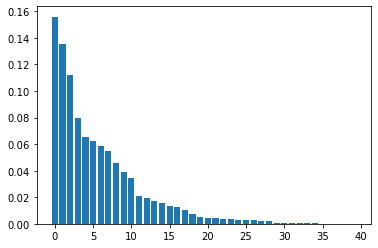

In [26]:
features = sorted(rf_model.feature_importances_, reverse=True)
print(features)
plt.bar(x = range(len(features)), height=features)
plt.xlabel = ("feature")
#plt.savefig('featureimportance.png')
plt.show()

In [27]:
colleges_full.hvplot.scatter(x="total_enrollment", y="average_tuition", by="fullcluster")

:NdOverlay   [fullcluster]
   :Scatter   [total_enrollment]   (average_tuition)

In [28]:
colleges_train.hvplot.scatter(x="total_enrollment", y="average_tuition", by="splitcluster")

:NdOverlay   [splitcluster]
   :Scatter   [total_enrollment]   (average_tuition)

In [31]:
colleges_split.hvplot.scatter(x="total_enrollment", y="average_tuition", by="splitcluster")

:NdOverlay   [splitcluster]
   :Scatter   [total_enrollment]   (average_tuition)

In [32]:
colleges_full.hvplot.scatter(x="instate_price", y="applicants_total", by="fullcluster")

:NdOverlay   [fullcluster]
   :Scatter   [instate_price]   (applicants_total)

In [33]:
colleges_split.hvplot.scatter(x="instate_price", y="applicants_total", by="splitcluster")

:NdOverlay   [splitcluster]
   :Scatter   [instate_price]   (applicants_total)

In [34]:
colleges_train.hvplot.scatter(x="instate_price", y="applicants_total", by="splitcluster")

:NdOverlay   [splitcluster]
   :Scatter   [instate_price]   (applicants_total)

In [38]:
colleges_full.hvplot.scatter(x="total_enrollment", y="private", by="fullcluster")

:NdOverlay   [fullcluster]
   :Scatter   [total_enrollment]   (private)

In [39]:
colleges_train.hvplot.scatter(x="total_enrollment", y="private", by="splitcluster")

:NdOverlay   [splitcluster]
   :Scatter   [total_enrollment]   (private)